# **Load data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df_raw = pd.read_csv('cleaned_data.csv')
df_raw.shape

(191614, 23)

In [ ]:
df_raw.head()

,imdb_id,tmdb_id,title,release_date,runtime,genres,director,top_cast,original_language,production_companies,...,actor_1_score,actor_2_score,actor_3_score,actor_4_score,actor_5_score,director_score,average_actor_score,top_actor_score,number_of_actors,main_production_country
0,tt0015724,286375,Dama de Noche,1993-05-18,96.0,"Drama, Mystery, Romance, Thriller",Eva López Sánchez,"Rafael Sánchez Navarro, Cecilia Toussaint, Mig...",es,Centro de Capacitación Cinematográfica (CCC),...,13,7,12,16,70,2,23.6,70,5,Mexico
1,tt0035423,11232,Kate & Leopold,2001-12-25,118.0,"Romance, Comedy, Fantasy",James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",en,"Konrad Pictures, Miramax",...,51,43,58,31,31,13,42.8,58,5,United States of America
2,tt0036606,73069,"Another Time, Another Place",1983-05-13,96.0,"Drama, Romance, War",Michael Radford,"Phyllis Logan, Giovanni Mauriello, Denise Coff...",en,"Umbrella, Associated-Rediffusion Television, T...",...,4,0,20,22,1,3,9.4,22,5,United Kingdom
3,tt0039442,133498,"Speak, Silent One",1973-06-01,88.0,Drama,Manuel Gutiérrez Aragón,"José Luis López Vázquez, Kiti Mánver, Hanna Ha...",es,"Filmverlag der Autoren, Elías Querejeta PC",...,144,2,0,10,2,3,31.6,144,5,Spain
4,tt0044952,235186,The Citizen,1977-09-20,112.0,Drama,Ritwik Ghatak,"Satindra Bhattacharya, Prabhadevi, Sova Sen, K...",bn,Missing value,...,10,4,26,12,1,48,10.6,26,5,India


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191614 entries, 0 to 191613
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   imdb_id                  191614 non-null  object 
 1   tmdb_id                  191614 non-null  int64  
 2   title                    191614 non-null  object 
 3   release_date             188802 non-null  object 
 4   runtime                  175081 non-null  float64
 5   genres                   191614 non-null  object 
 6   director                 191614 non-null  object 
 7   top_cast                 191614 non-null  object 
 8   original_language        191614 non-null  object 
 9   production_companies     191614 non-null  object 
 10  budget                   23099 non-null   float64
 11  revenue                  44501 non-null   float64
 12  status                   191614 non-null  object 
 13  actor_1_score            191614 non-null  int64  
 14  acto

# **Investigating missing target variable: revenue**

### Droping row where status != 'Released' because unreleased movie are definitely missing revenue

In [ ]:
df = df_raw.copy()
df = df[df['status'] == 'Released']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191312 entries, 0 to 191613
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   imdb_id                  191312 non-null  object 
 1   tmdb_id                  191312 non-null  int64  
 2   title                    191312 non-null  object 
 3   release_date             188683 non-null  object 
 4   runtime                  174897 non-null  float64
 5   genres                   191312 non-null  object 
 6   director                 191312 non-null  object 
 7   top_cast                 191312 non-null  object 
 8   original_language        191312 non-null  object 
 9   production_companies     191312 non-null  object 
 10  budget                   23026 non-null   float64
 11  revenue                  44496 non-null   float64
 12  status                   191312 non-null  object 
 13  actor_1_score            191312 non-null  int64  
 14  actor_2_s

## Investigating release year, budget, runtime and average actor score

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

df['revenue_status'] = np.where((df['revenue'].notnull()) & (df['revenue'] > 0), 'With Revenue', 'No Revenue')

### Reapplying filters(we already filtered this before the extraction process but due to data inaccuracy, some still slip through)

In [ ]:
df = df[(df['release_date'] <= '2025-10-01') & (df['release_year']>=1970)]
df = df[df['runtime']>60]
df = df[~df['genres'].str.contains('Documentary')]
df.shape

(170128, 25)

In [ ]:
total_rows = len(df)
missing_revenue = df['revenue'].isnull().sum()
percent_missing = (missing_revenue / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Missing Revenue: {missing_revenue} ({percent_missing:.2f}%)")
print(f"Has Revenue: {total_rows - missing_revenue} ({100 - percent_missing:.2f}%)")

Total rows: 170128
Missing Revenue: 127309 (74.83%)
Has Revenue: 42819 (25.17%)


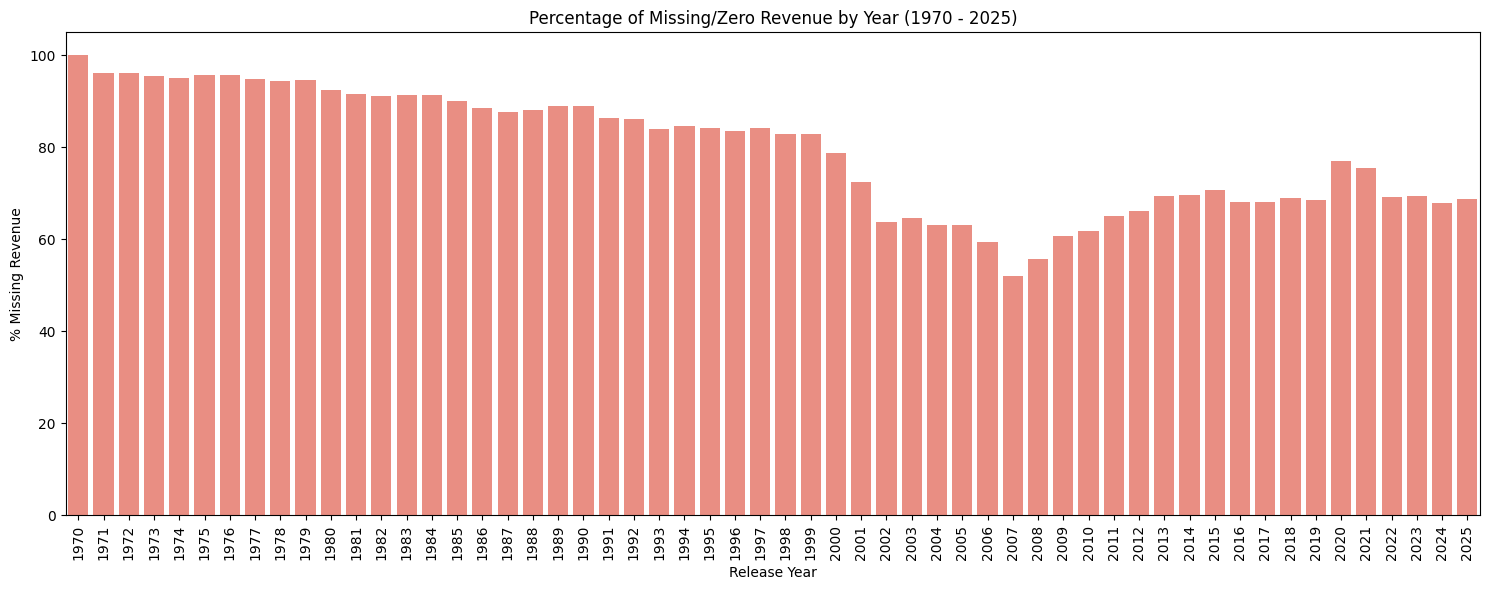

In [ ]:
missing_by_year = df.groupby('release_year')['revenue_status'].agg(lambda x: (x == 'No Revenue').mean() * 100)
# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=missing_by_year.index.astype(int), y=missing_by_year.values, color='salmon')

plt.title('Percentage of Missing/Zero Revenue by Year (1970 - 2025)')
plt.ylabel('% Missing Revenue')
plt.xlabel('Release Year')
plt.xticks(rotation=90)
plt.tight_layout()

### Older movies are missing revenue

/tmp/ipython-input-2394015674.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='revenue_status', y='log_budget', data=df, ax=axes[0], palette='Set2', inner='quartile')
/tmp/ipython-input-2394015674.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='revenue_status', y='average_actor_score', data=df_actor_score_filtered, ax=axes[1], palette='Set2', inner='quartile')
/tmp/ipython-input-2394015674.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='revenue_status', y='director_score', data=df_director_score_filtered, ax=a

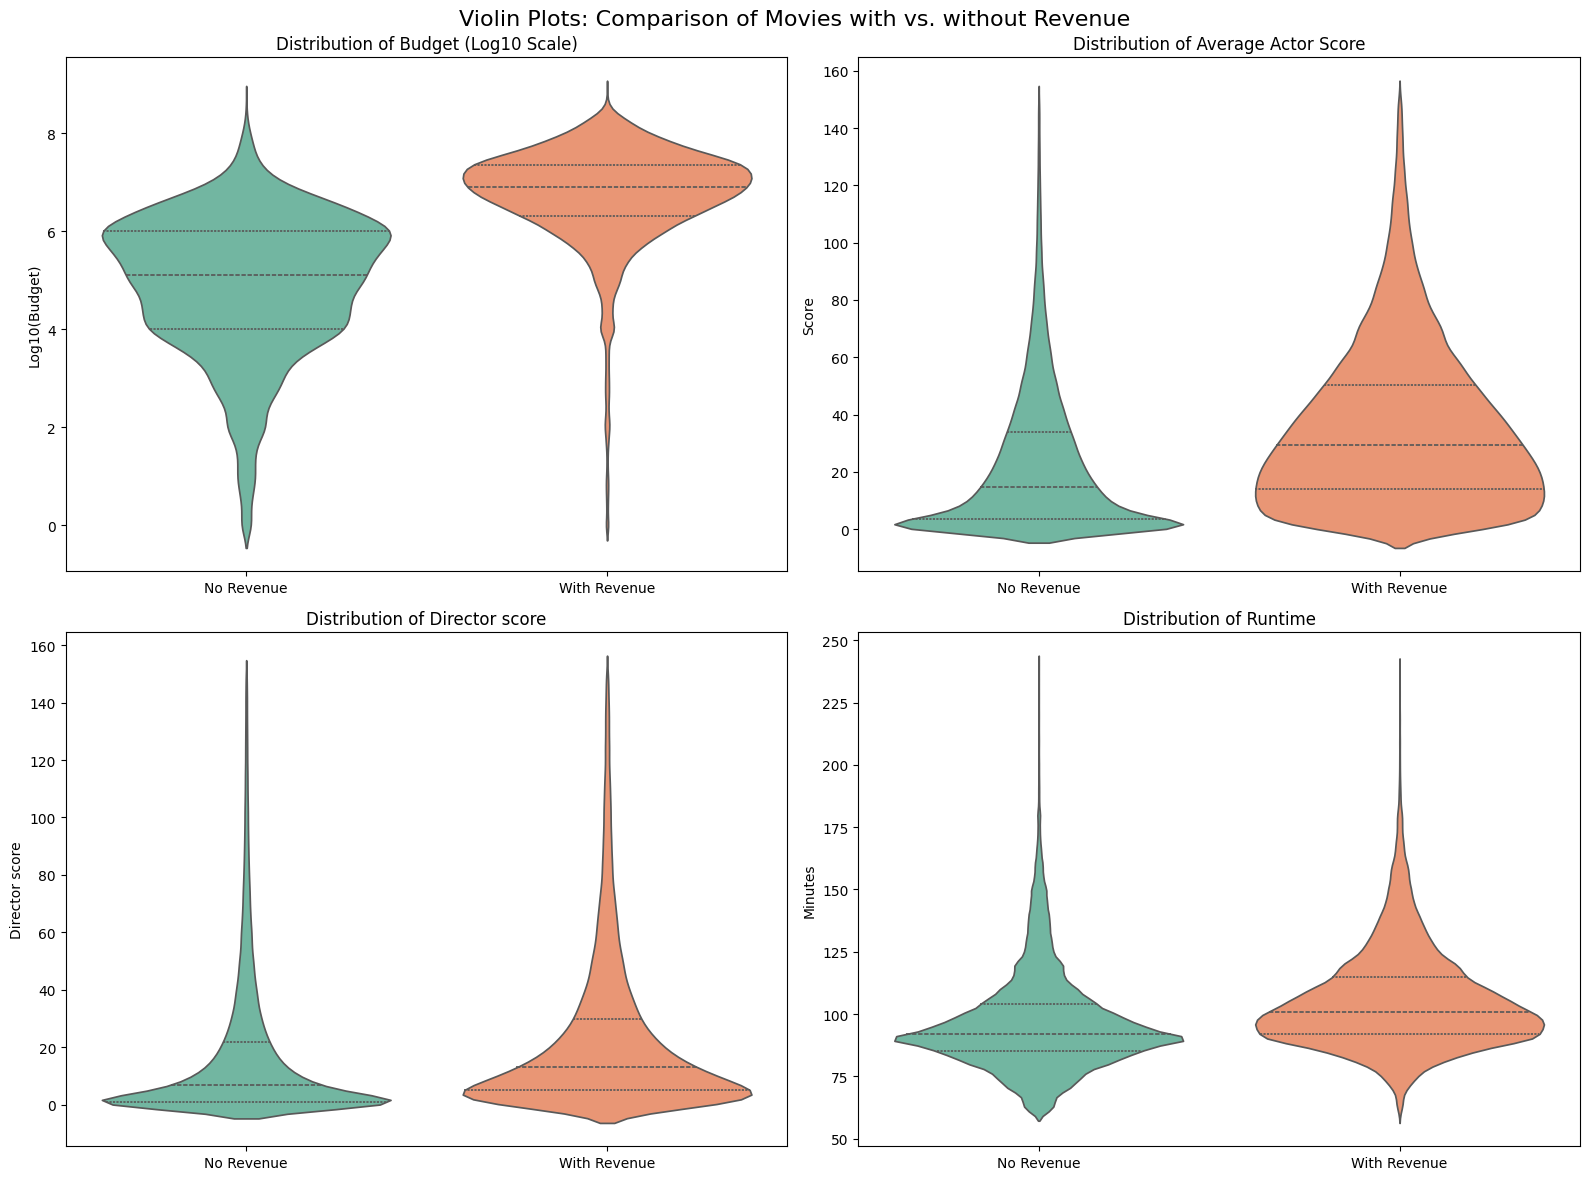

In [ ]:
df['log_budget'] = np.log10(df['budget'].replace(0, np.nan))

# Filter better visualization (exclude extreme outliers for the main plot view)
df_runtime_filtered = df[df['runtime'] <= 240]
df_actor_score_filtered = df[df['average_actor_score'] <= 150]
df_director_score_filtered = df[df['director_score'] <= 150]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 1. Budget (Log Scale) - Violin
sns.violinplot(x='revenue_status', y='log_budget', data=df, ax=axes[0], palette='Set2', inner='quartile')
axes[0].set_title('Distribution of Budget (Log10 Scale)')
axes[0].set_ylabel('Log10(Budget)')
axes[0].set_xlabel('')

# 2. Average Actor Score - Violin
sns.violinplot(x='revenue_status', y='average_actor_score', data=df_actor_score_filtered, ax=axes[1], palette='Set2', inner='quartile')
axes[1].set_title('Distribution of Average Actor Score')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('')

# 3. Director score - Violin
sns.violinplot(x='revenue_status', y='director_score', data=df_director_score_filtered, ax=axes[2], palette='Set2', inner='quartile')
axes[2].set_title('Distribution of Director score')
axes[2].set_ylabel('Director score')
axes[2].set_xlabel('')

# 4. Runtime - Violin
sns.violinplot(x='revenue_status', y='runtime', data=df_runtime_filtered, ax=axes[3], palette='Set2', inner='quartile')
axes[3].set_title('Distribution of Runtime')
axes[3].set_ylabel('Minutes')
axes[3].set_xlabel('')

plt.suptitle('Violin Plots: Comparison of Movies with vs. without Revenue', fontsize=16)
plt.tight_layout()

### Movie with missing revenue has lower budget, actor popularity and runtime

## Investigate based on language, country and genre

/tmp/ipython-input-3949544381.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats.values, y=genre_stats.index, ax=axes[0], palette='magma')
/tmp/ipython-input-3949544381.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_stats.values, y=lang_stats.index, ax=axes[1], palette='viridis')
/tmp/ipython-input-3949544381.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_stats.values, y=country_stats.index, ax=axes[2], palette='cubehelix')


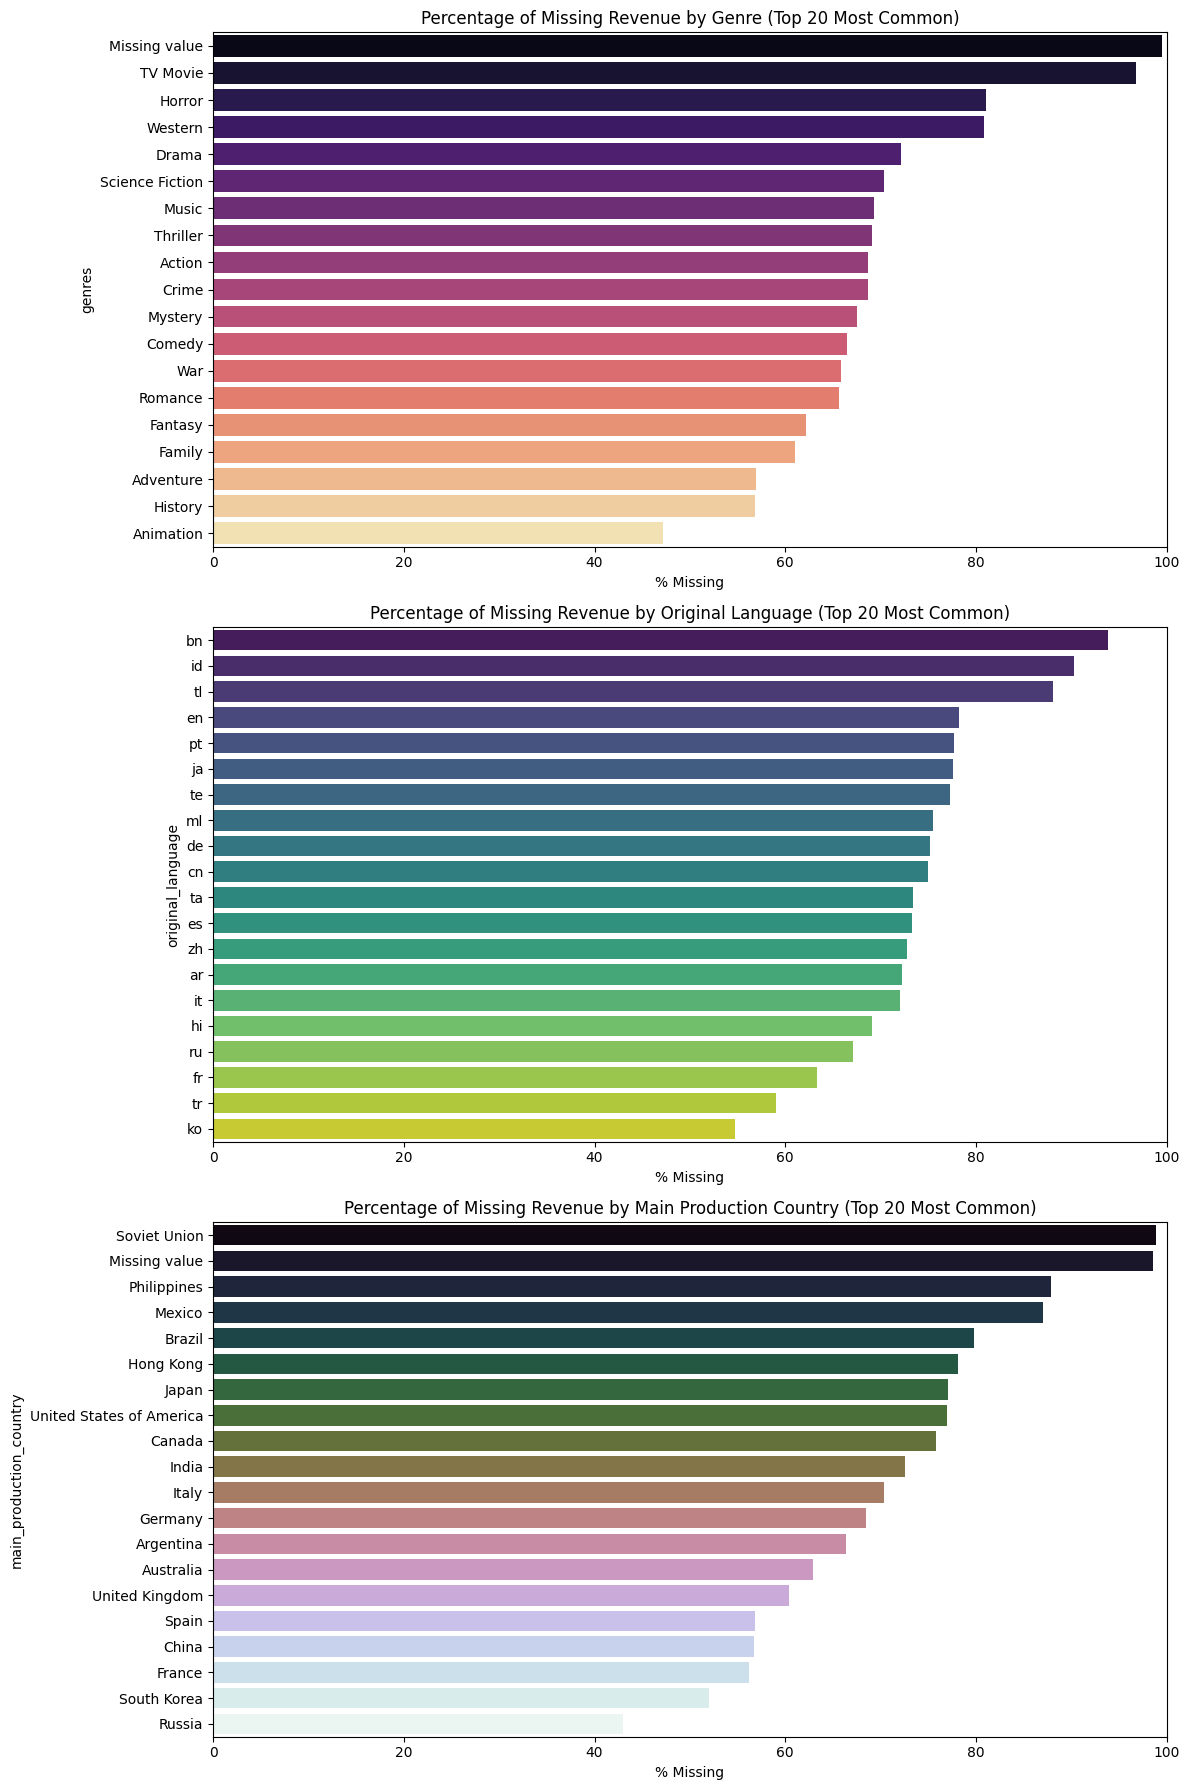

In [ ]:
df['is_revenue_missing'] = df['revenue'].isnull() | (df['revenue'] == 0)

# Function to calculate missing percentage for top N categories
def get_missing_stats(df, column, top_n=20, is_list=False):
    if is_list:
        # Explode the list column
        temp_df = df[[column, 'is_revenue_missing']].copy()
        temp_df[column] = temp_df[column].str.split(', ')
        exploded = temp_df.explode(column)

        # Count frequencies
        counts = exploded[column].value_counts()
        top_cats = counts.head(top_n).index

        # Filter and calculate mean
        stats = exploded[exploded[column].isin(top_cats)].groupby(column)['is_revenue_missing'].mean() * 100
    else:
        # Count frequencies
        counts = df[column].value_counts()
        top_cats = counts.head(top_n).index

        # Filter and calculate mean
        stats = df[df[column].isin(top_cats)].groupby(column)['is_revenue_missing'].mean() * 100

    return stats.sort_values(ascending=False)

# 1. Genres
genre_stats = get_missing_stats(df, 'genres', top_n=20, is_list=True)

# 2. Original Language
lang_stats = get_missing_stats(df, 'original_language', top_n=20, is_list=False)

# 3. Main Production Country
country_stats = get_missing_stats(df, 'main_production_country', top_n=20, is_list=False)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Genres
sns.barplot(x=genre_stats.values, y=genre_stats.index, ax=axes[0], palette='magma')
axes[0].set_title('Percentage of Missing Revenue by Genre (Top 20 Most Common)')
axes[0].set_xlabel('% Missing')
axes[0].set_xlim(0, 100)

# Plot 2: Language
sns.barplot(x=lang_stats.values, y=lang_stats.index, ax=axes[1], palette='viridis')
axes[1].set_title('Percentage of Missing Revenue by Original Language (Top 20 Most Common)')
axes[1].set_xlabel('% Missing')
axes[1].set_xlim(0, 100)

# Plot 3: Country
sns.barplot(x=country_stats.values, y=country_stats.index, ax=axes[2], palette='cubehelix')
axes[2].set_title('Percentage of Missing Revenue by Main Production Country (Top 20 Most Common)')
axes[2].set_xlabel('% Missing')
axes[2].set_xlim(0, 100)

plt.tight_layout()

### **Conclusion: Model will be less accurate on Non theatre released movies and indie movies with less budget**

### Dropping movie with no revenue

In [ ]:
df = df[~df['is_revenue_missing']]
df.drop('is_revenue_missing', axis=1, inplace=True)
df.drop('log_budget', axis=1, inplace=True)
df.drop('release_year', axis=1, inplace=True)
df.drop('revenue_status', axis=1, inplace=True)
df.drop('status', axis=1,inplace = True)
df.shape

(42819, 22)

# **Investigating missing feature variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42819 entries, 1 to 191599
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   imdb_id                  42819 non-null  object        
 1   tmdb_id                  42819 non-null  int64         
 2   title                    42819 non-null  object        
 3   release_date             42819 non-null  datetime64[ns]
 4   runtime                  42819 non-null  float64       
 5   genres                   42819 non-null  object        
 6   director                 42819 non-null  object        
 7   top_cast                 42819 non-null  object        
 8   original_language        42819 non-null  object        
 9   production_companies     42819 non-null  object        
 10  budget                   13592 non-null  float64       
 11  revenue                  42819 non-null  float64       
 12  actor_1_score            42819 non-n

In [ ]:
missing_percentages = df.replace('Missing value', np.nan).isnull().mean() * 100
print("Percentage of missing data in each column:")
print(missing_percentages)

Percentage of missing data in each column:
imdb_id                     0.000000
tmdb_id                     0.000000
title                       0.000000
release_date                0.000000
runtime                     0.000000
genres                      0.147131
director                    0.088746
top_cast                    0.079404
original_language           0.000000
production_companies        8.220650
budget                     68.257082
revenue                     0.000000
actor_1_score               0.000000
actor_2_score               0.000000
actor_3_score               0.000000
actor_4_score               0.000000
actor_5_score               0.000000
director_score              0.000000
average_actor_score         0.000000
top_actor_score             0.000000
number_of_actors            0.000000
main_production_country     0.768350
dtype: float64


## **Conclusion:** Budget missing 68% of the time, becareful when using imputation methods for this column, other missing columns are categorical variables which dont need any imputation method

# **Univariate Analysis**

## Analysing numerical columns

In [ ]:
df['budget'] = df['budget'].astype(pd.Int64Dtype())
df['revenue'] = df['revenue'].astype(pd.Int64Dtype())

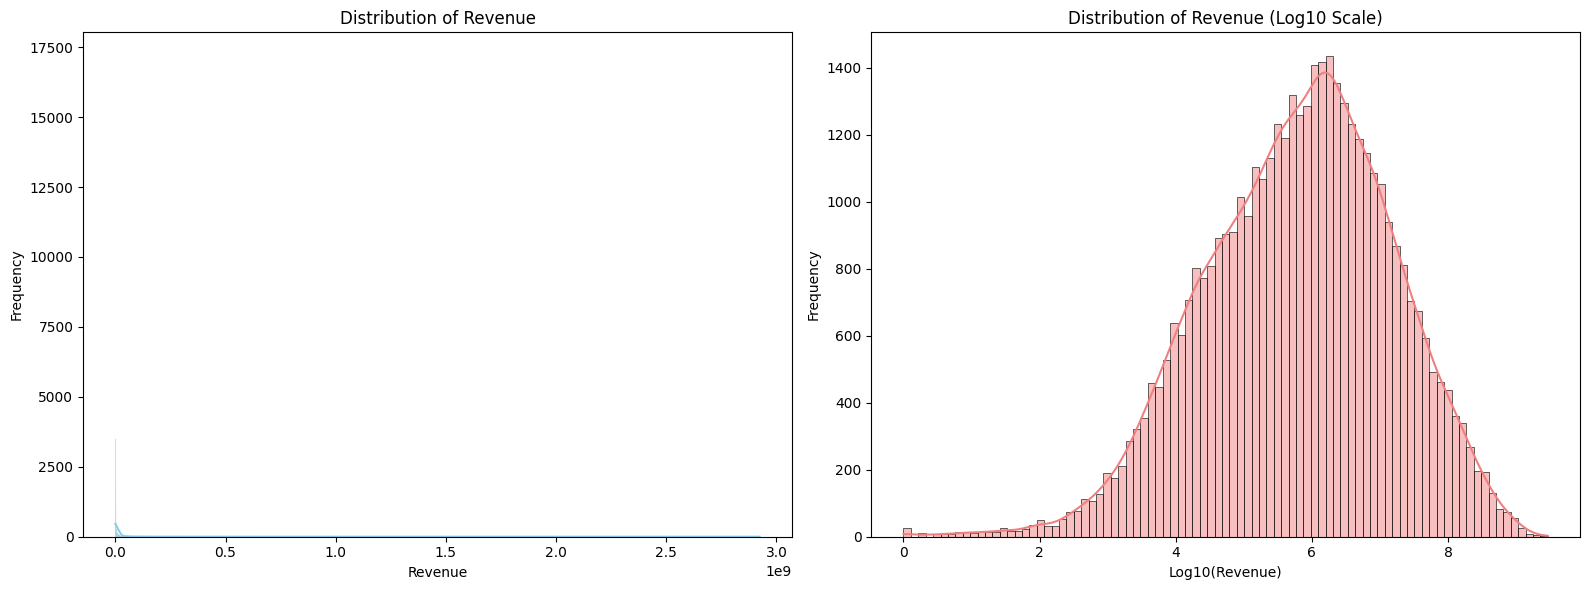

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.histplot(df['revenue'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')


sns.histplot(np.log10(df['revenue']), kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Revenue (Log10 Scale)')
axes[1].set_xlabel('Log10(Revenue)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Revenue is extremely right skewed, needs to apply log transform when modeling

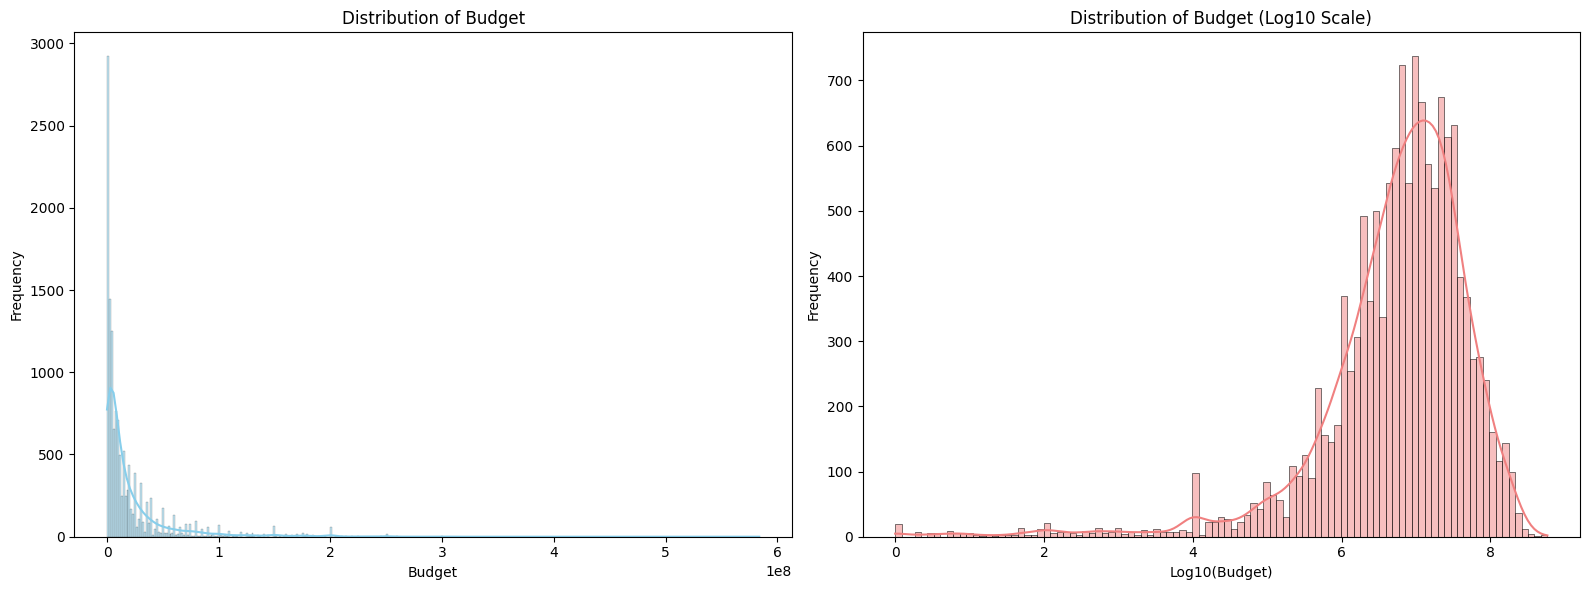

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.histplot(df['budget'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Budget')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Frequency')


sns.histplot(np.log10(df['budget']), kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Budget (Log10 Scale)')
axes[1].set_xlabel('Log10(Budget)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Budget is similar, require log transform when modeling

In [ ]:
df.describe()

,tmdb_id,release_date,runtime,budget,revenue,actor_1_score,actor_2_score,actor_3_score,actor_4_score,actor_5_score,director_score,average_actor_score,top_actor_score,number_of_actors
count,4.281900e+04,42819,42819.000000,13592.0,42819.0,42819.000000,42819.000000,42819.000000,42819.000000,42819.000000,42819.000000,42819.000000,42819.000000,42819.000000
mean,3.691527e+05,2011-05-05 03:10:32.831219712,105.549406,20776534.184962,19527629.597889,27.494594,31.181532,33.345664,37.957379,52.324902,25.483944,36.460814,80.129452,4.947080
min,3.000000e+00,1971-01-01 00:00:00,61.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.585050e+04,2006-04-19 00:00:00,92.000000,2100000.0,73594.5,9.000000,8.000000,6.000000,4.000000,4.000000,5.000000,14.200000,31.000000,5.000000
50%,2.556610e+05,2013-07-16 00:00:00,101.000000,8000000.0,780846.0,20.000000,22.000000,21.000000,19.000000,21.000000,13.000000,29.600000,63.000000,5.000000
75%,5.752085e+05,2019-06-22 00:00:00,115.000000,23000000.0,5959322.5,39.000000,45.000000,49.000000,54.000000,75.000000,31.000000,50.800000,109.000000,5.000000
max,1.592088e+06,2025-10-01 00:00:00,803.000000,583900000.0,2923706026.0,332.000000,426.000000,434.000000,675.000000,1105.000000,677.000000,368.200000,1105.000000,6.000000
std,3.797608e+05,NaN,20.619687,35517863.126971,84674973.626431,25.485488,31.112188,37.599441,49.203391,72.358451,37.855614,30.269566,69.532847,0.354998


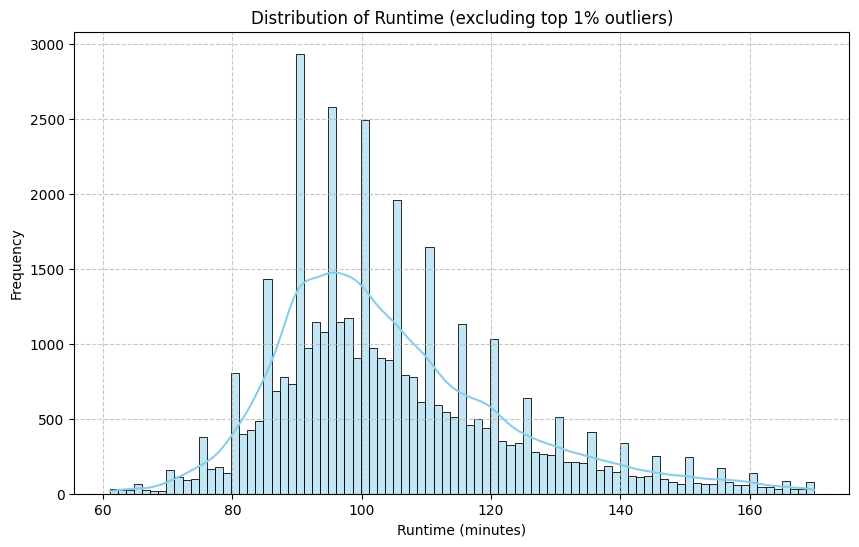

In [ ]:
runtime_99th_percentile = df['runtime'].quantile(0.99)
df_filtered_runtime = df[df['runtime'] <= runtime_99th_percentile]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_runtime['runtime'], kde=True, color='skyblue')
plt.title('Distribution of Runtime (excluding top 1% outliers)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Budget and revenue has some values logged as \$1, and budget distribution has a spike at \$10,000. Which suggest these could be placeholder or rough estimated values mixing in.

### The left tail of both graphs suggest that movies with low budget and low revenue have really small counts, probably because most of these goes undocumented

### **Conclusion:** we should

1.   Apply log transform for revenue and budget
2.   Remove noise values, replace budget noise with null and remove record where revenue = 1, budget will be imputed later

Our model will likely be less accurate on low budget (budget < 10000) movie

In [ ]:
df.loc[(df['budget'] == 1) | (df['budget'] == 10000), 'budget'] = np.nan
df = df[df['revenue'] != 1]

df.shape

(42792, 22)

## Analysing categorical columns

In [ ]:
def analyze_freq(df, col_name):
    """
    Analyzes a categorical column and returns a summary dataframe
    with counts, percentages, and cumulative percentages.
    """

    counts = df[col_name].value_counts()

    percs = df[col_name].value_counts(normalize=True) * 100

    summary = pd.concat([counts, percs], axis=1, keys=['Count', 'Percentage'])

    summary['Cumulative %'] = summary['Percentage'].cumsum()

    return summary
def analyze_multivalue_freq(df, col, sep=','):
    """
    Analyzes a column containing multiple values separated by a delimiter.
    Returns a summary DF with Item Counts, % of Total Items, and % of Rows.
    """

    exploded = df[col].dropna().astype(str).str.split(sep).explode().str.strip()

    counts = exploded.value_counts()

    perc_of_items = exploded.value_counts(normalize=True) * 100

    perc_of_rows = (counts / len(df)) * 100

    summary = pd.concat([counts, perc_of_items, perc_of_rows], axis=1)
    summary.columns = ['Count', '% of Total Items', '% of Rows']

    summary['Cumulative %'] = summary['% of Total Items'].cumsum()

    return summary

In [ ]:
analyze_freq(df, 'original_language')

,Count,Percentage,Cumulative %
original_language,,,
en,14659,34.256403,34.256403
fr,3517,8.218826,42.475229
es,2926,6.837727,49.312956
ja,2178,5.089736,54.402692
ko,1567,3.661899,58.064592
...,...,...,...
yi,1,0.002337,99.990652
ii,1,0.002337,99.992989
ay,1,0.002337,99.995326


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cumulative %'].plot(kind='hist', bins=20, title='Cumulative %')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Count', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Percentage', y='Cumulative %', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cumulative %']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Cumulative %', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative %')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cumulative %']
  ys = series['Percentage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Cumulative %', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative %')
_ = plt.ylabel('Percentage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Cumulative %']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Cumulative %'}, axis=1)
              .sort_values('Cumulative %', ascending=True))
  xs = counted['Cumulative %']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Cumulative %', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative %')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Percentage'].plot(kind='line', figsize=(8, 4), title='Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Cumulative %'].plot(kind='line', figsize=(8, 4), title='Cumulative %')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
analyze_freq(df,'main_production_country')

,Count,Percentage,Cumulative %
main_production_country,,,
United States of America,7613,17.790709,17.790709
France,3553,8.302954,26.093662
India,3402,7.950084,34.043746
United Kingdom,2217,5.180875,39.224621
Japan,2215,5.176201,44.400823
...,...,...,...
Brunei Darussalam,1,0.002337,99.990652
Maldives,1,0.002337,99.992989
Bahrain,1,0.002337,99.995326


In [ ]:
analyze_multivalue_freq(df, 'genres', sep=', ')

,Count,% of Total Items,% of Rows,Cumulative %
genres,,,,
Drama,23772,25.804631,55.552440,25.804631
Comedy,15976,17.342032,37.334081,43.146663
Romance,7778,8.443060,18.176295,51.589722
Thriller,7750,8.412666,18.110862,60.002388
Action,6574,7.136112,15.362685,67.138500
Crime,4689,5.089934,10.957656,72.228434
Horror,3901,4.234556,9.116190,76.462990
Adventure,3852,4.181366,9.001683,80.644356
Family,3485,3.782986,8.144046,84.427342


In [ ]:
analyze_multivalue_freq(df, 'production_companies', sep=', ')

,Count,% of Total Items,% of Rows,Cumulative %
production_companies,,,,
Missing value,3516,2.880338,8.216489,2.880338
Universal Pictures,685,0.561158,1.600766,3.441496
Warner Bros. Pictures,597,0.489068,1.395121,3.930564
Paramount Pictures,530,0.434181,1.238549,4.364745
Canal+,526,0.430904,1.229202,4.795648
...,...,...,...,...
Seven FIlms Producciones,1,0.000819,0.002337,99.996723
Lighter Buddha Films,1,0.000819,0.002337,99.997542
Media Pro Entertainment,1,0.000819,0.002337,99.998362


In [ ]:
analyze_multivalue_freq(df, 'top_cast', sep=', ')

,Count,% of Total Items,% of Rows,Cumulative %
top_cast,,,,
Prakash Raj,94,0.044396,0.219667,0.044396
Akshay Kumar,93,0.043924,0.217330,0.088320
Nicolas Cage,91,0.042979,0.212657,0.131299
Gérard Depardieu,90,0.042507,0.210320,0.173806
Bruce Willis,89,0.042035,0.207983,0.215841
...,...,...,...,...
Juan Saavedra,1,0.000472,0.002337,99.998111
Owen Williams,1,0.000472,0.002337,99.998583
Jared Raab,1,0.000472,0.002337,99.999055


In [ ]:
analyze_freq(df,'director')

,Count,Percentage,Cumulative %
director,,,
Woody Allen,47,0.109834,0.109834
Clint Eastwood,40,0.093475,0.203309
Missing value,38,0.088802,0.292111
Takashi Miike,38,0.088802,0.380912
Herman Yau,34,0.079454,0.460366
...,...,...,...
"Praveena Paruchuri, Kiran R",1,0.002337,99.990652
"Byeon Hee-sun, Moon Sun-young, Han Su-jeong",1,0.002337,99.992989
Pan Visitsak,1,0.002337,99.995326


### **Conclusion**


*   'original language', 'main_production_country', 'production_companies','director' and 'top_cast' are high cardinality columns
*   'genre' is the only low cardinality column
#### Recommended feature engineering stategy to try:



*   'genre' : one hot encoding
*   'original language', 'main_production_country': Try a grouping method, group low number columns into its own category called 'other' then try onehotencoding
*   'production_companies': Try frequency encoding, or do a similar grouping method then do one-hot-encoding
*   'director' and 'top_cast': Try grouping method then do one-hot-encoding, Or just drop these and just use their score






# **Multivariate Analysis**

## Numeric vs numeric

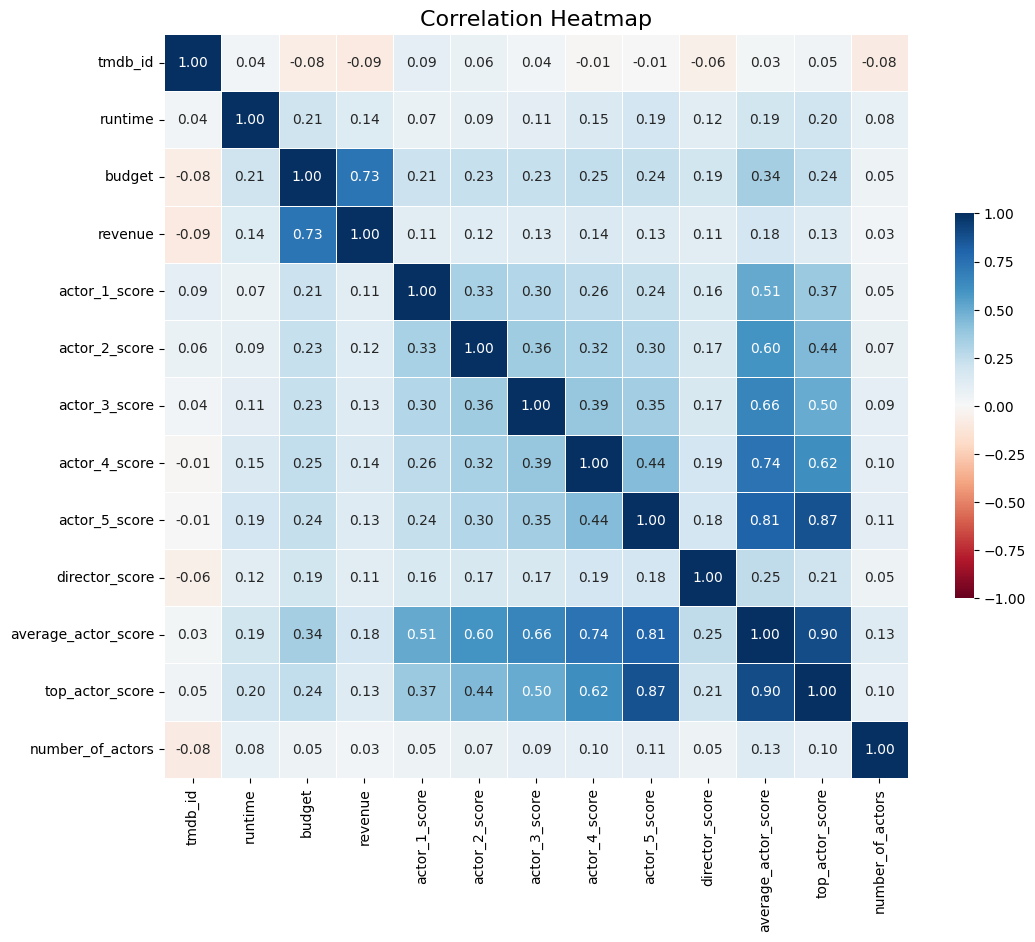

In [ ]:
def plot_correlation_heatmap(df, title='Correlation Heatmap'):
    # 1. Calculate correlation (only for numeric columns)
    corr = df.corr(numeric_only=True)


    # 3. Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # 4. Generate the heatmap
    sns.heatmap(
        corr,               # Apply the mask
        cmap='RdBu',            # 'RdBu' (Red-Blue) is standard for +/- correlations
        vmax=1, vmin=-1,        # Ensure colors scale from -1 to 1 exactly
        center=0,               # 0 is white (no correlation)
        square=True,            # Force squares to be square
        linewidths=.5,          # Space between squares
        annot=True,             # Show the actual numbers
        fmt=".2f",              # Format numbers to 2 decimal places
        cbar_kws={"shrink": .5} # Shrink the color bar slightly
    )

    plt.title(title, fontsize=16)
    plt.show()
plot_correlation_heatmap(df)

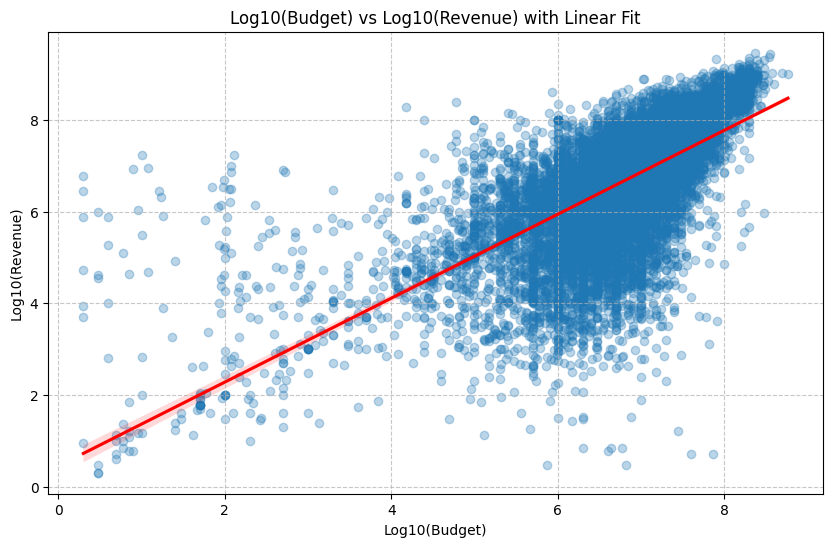

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x=np.log10(df['budget'].replace(0, np.nan)), y=np.log10(df['revenue'].replace(0, np.nan)),
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Log10(Budget) vs Log10(Revenue) with Linear Fit')
plt.xlabel('Log10(Budget)')
plt.ylabel('Log10(Revenue)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

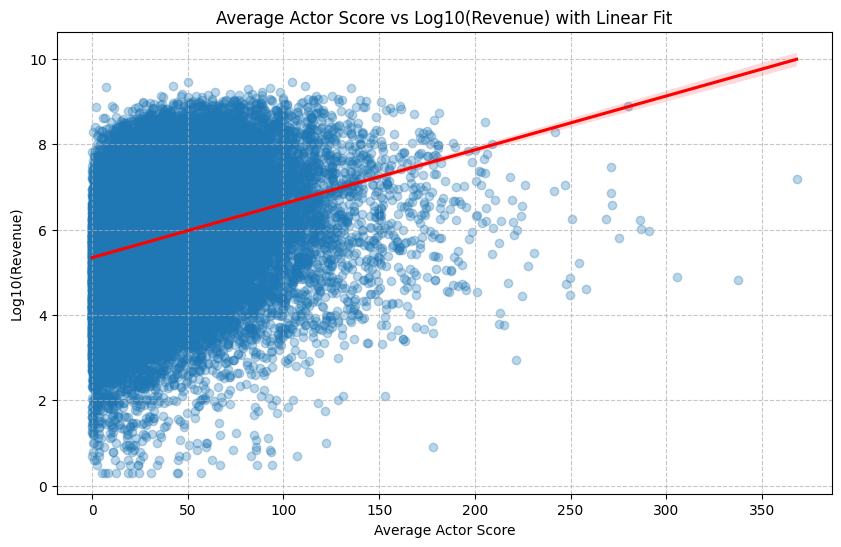

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['average_actor_score'], y=np.log10(df['revenue'].replace(0, np.nan)),
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Average Actor Score vs Log10(Revenue) with Linear Fit')
plt.xlabel('Average Actor Score')
plt.ylabel('Log10(Revenue)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

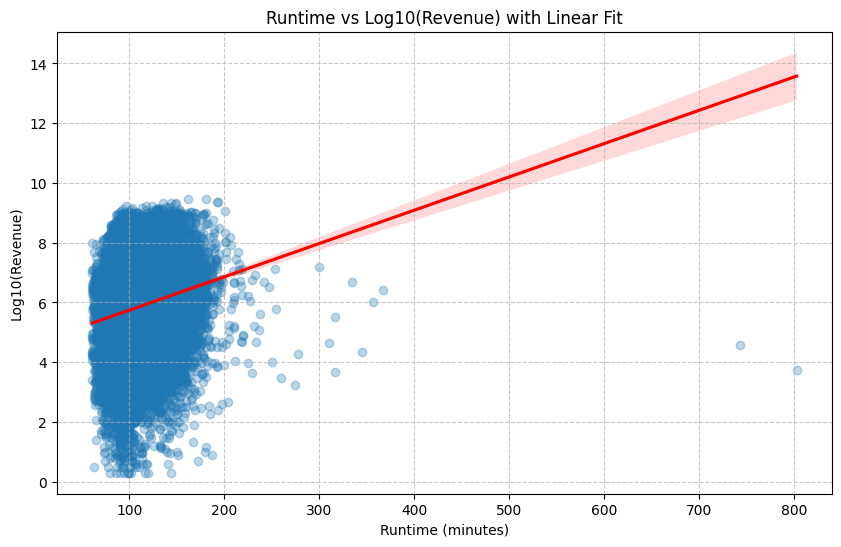

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['runtime'], y=np.log10(df['revenue'].replace(0, np.nan)),
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Runtime vs Log10(Revenue) with Linear Fit')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Log10(Revenue)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### The actor scores are highly correlated, we should only use 1, either avg score or top score

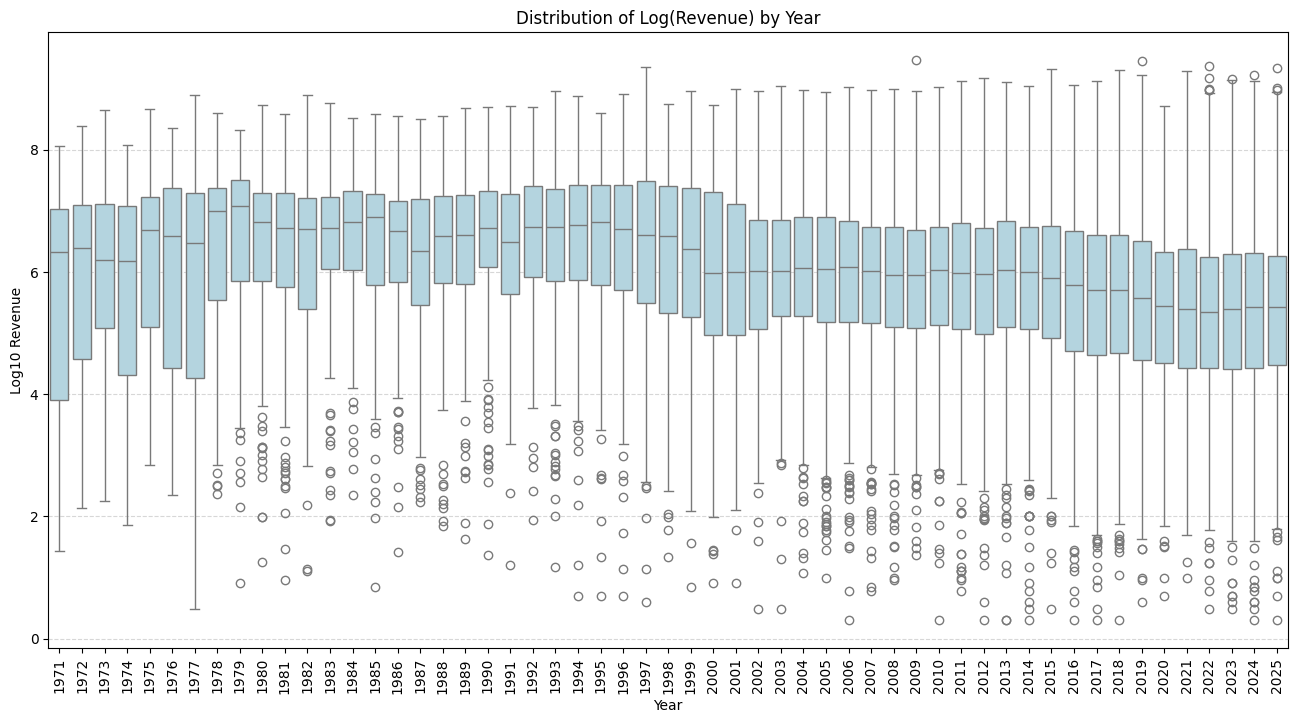

In [ ]:

df['year'] = df['release_date'].dt.year

# 2. Log transformation
df['log_revenue'] = np.log10(df['revenue'].replace(0, np.nan)) # Handle 0s

# 3. Create Boxplot
plt.figure(figsize=(16, 8)) # Wider figure for many years
sns.boxplot(data=df, x='year', y='log_revenue', color='lightblue')

# 4. Formatting
plt.title('Distribution of Log(Revenue) by Year')
plt.xlabel('Year')
plt.ylabel('Log10 Revenue')
plt.xticks(rotation=90) # Rotate x labels to fit them all
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
df.drop(['year', 'log_revenue'], axis=1, inplace=True)

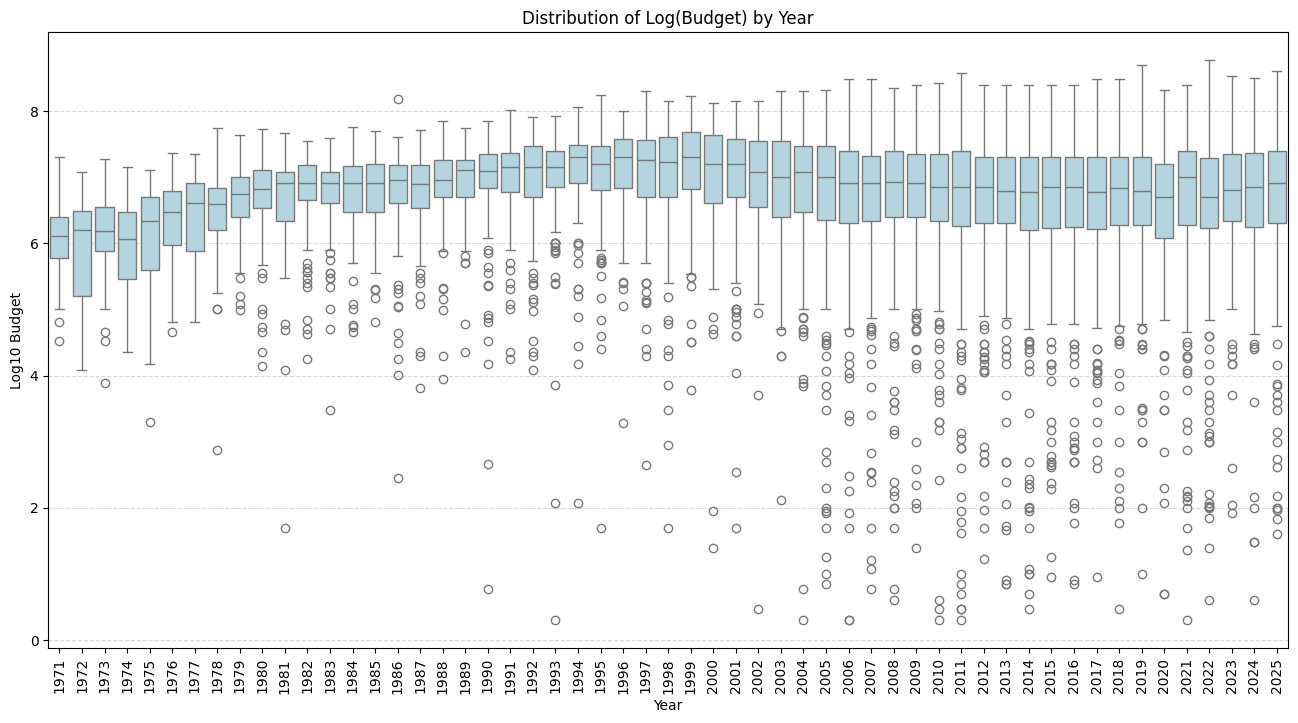

In [ ]:
df['year'] = df['release_date'].dt.year

# 2. Log transformation
df['log_budget'] = np.log10(df['budget'].replace(0, np.nan)) # Handle 0s

# 3. Create Boxplot
plt.figure(figsize=(16, 8)) # Wider figure for many years
sns.boxplot(data=df, x='year', y='log_budget', color='lightblue')

# 4. Formatting
plt.title('Distribution of Log(Budget) by Year')
plt.xlabel('Year')
plt.ylabel('Log10 Budget')
plt.xticks(rotation=90) # Rotate x labels to fit them all
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
df.drop(['year', 'log_budget'], axis=1, inplace=True)

/tmp/ipython-input-2056330734.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette='viridis')


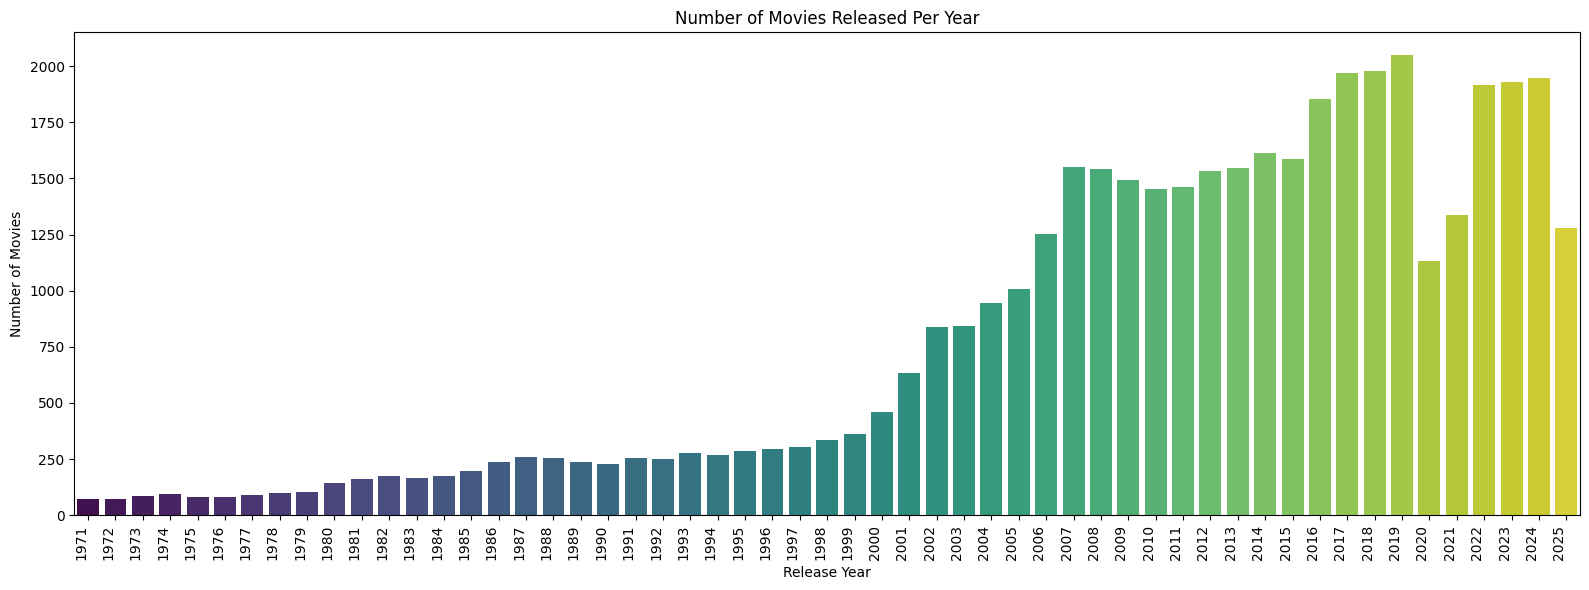

In [ ]:
df['release_year'] = df['release_date'].dt.year

movies_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(16, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette='viridis')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

df.drop('release_year', axis=1, inplace=True)

### Data before the year 2000 have higher revenue median, likely due to survivorship bias (only hit movies get recorded in full).

### Looking at other movies from the year 2000 onward, there is a downward trend of movie revenue and budget, indicating an increase in the number of low budget movies

### **Conclusion:** this is a time sensitive data


## Numeric vs category

/tmp/ipython-input-2013672420.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


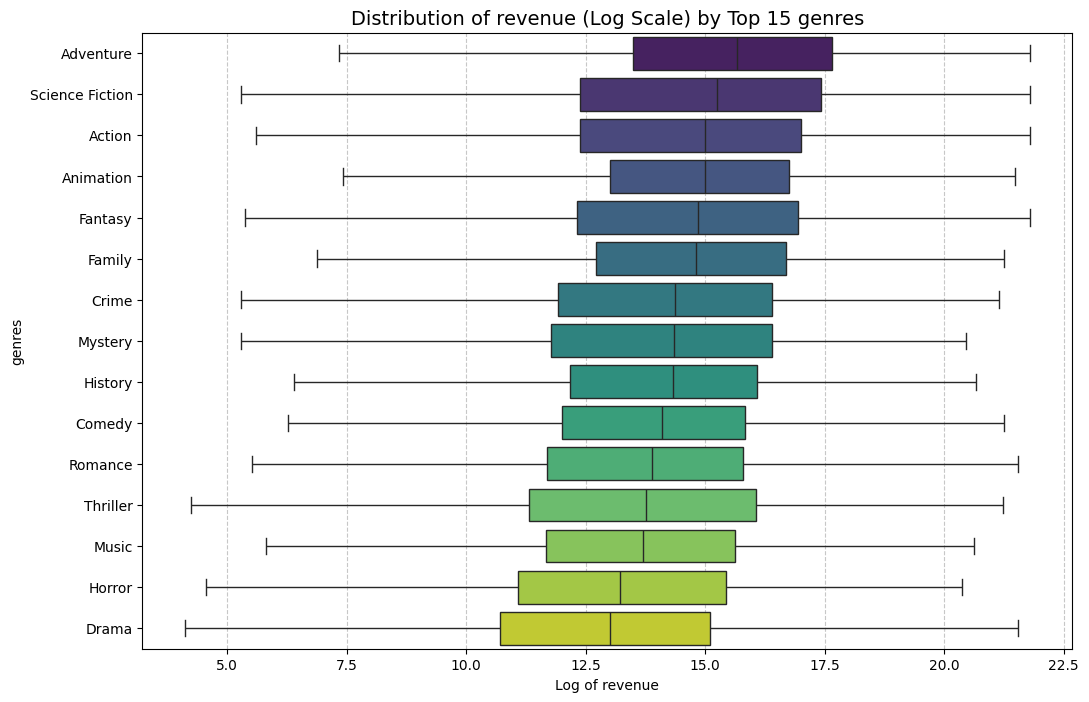

In [ ]:
def plot_multivalue_boxplot(df, cat_col, num_col, sep=',', top_n=15):
    """
    Creates a boxplot for a multi-value categorical column vs a numerical column.
    Applies Log Transformation to the numerical column automatically.

    Args:
        df: The dataframe
        cat_col: The column with multiple values (e.g. 'Production Companies')
        num_col: The numerical column (e.g. 'Revenue')
        sep: The separator used in cat_col (e.g. ',')
        top_n: Only plot the top N most frequent categories (to avoid overcrowding)
    """

    # 1. PREPARE THE DATA
    # Create a copy to avoid modifying the original dataframe
    data = df[[cat_col, num_col]].dropna().copy()

    # "Explode" the categorical column
    # If a movie is "Action, Sci-Fi" and made $100M, this creates:
    # Row 1: Action, $100M
    # Row 2: Sci-Fi, $100M
    data[cat_col] = data[cat_col].astype(str).str.split(sep)
    exploded = data.explode(cat_col)
    exploded[cat_col] = exploded[cat_col].str.strip()

    # 2. FILTER FOR TOP N CATEGORIES
    # (Without this, you might get 30,000 tiny boxplots)
    top_categories = exploded[cat_col].value_counts().head(top_n).index
    plot_data = exploded[exploded[cat_col].isin(top_categories)].copy()

    # 3. APPLY LOG TRANSFORM
    # We use log1p (log(1+x)) to safely handle zeros without errors
    log_col_name = f'Log_{num_col}'
    plot_data[log_col_name] = np.log1p(plot_data[num_col])

    # 4. PLOT
    plt.figure(figsize=(12, 8))

    # We sort the order by the Median value of the log column
    sort_order = plot_data.groupby(cat_col)[log_col_name].median().sort_values(ascending=False).index

    sns.boxplot(
        data=plot_data,
        x=log_col_name,
        y=cat_col,
        order=sort_order,
        palette='viridis',
        showfliers=False # Optional: Turn off outliers if they clutter the view
    )

    plt.title(f'Distribution of {num_col} (Log Scale) by Top {top_n} {cat_col}', fontsize=14)
    plt.xlabel(f'Log of {num_col}')
    plt.ylabel(cat_col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
plot_multivalue_boxplot(df, 'genres', 'revenue')

/tmp/ipython-input-2013672420.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


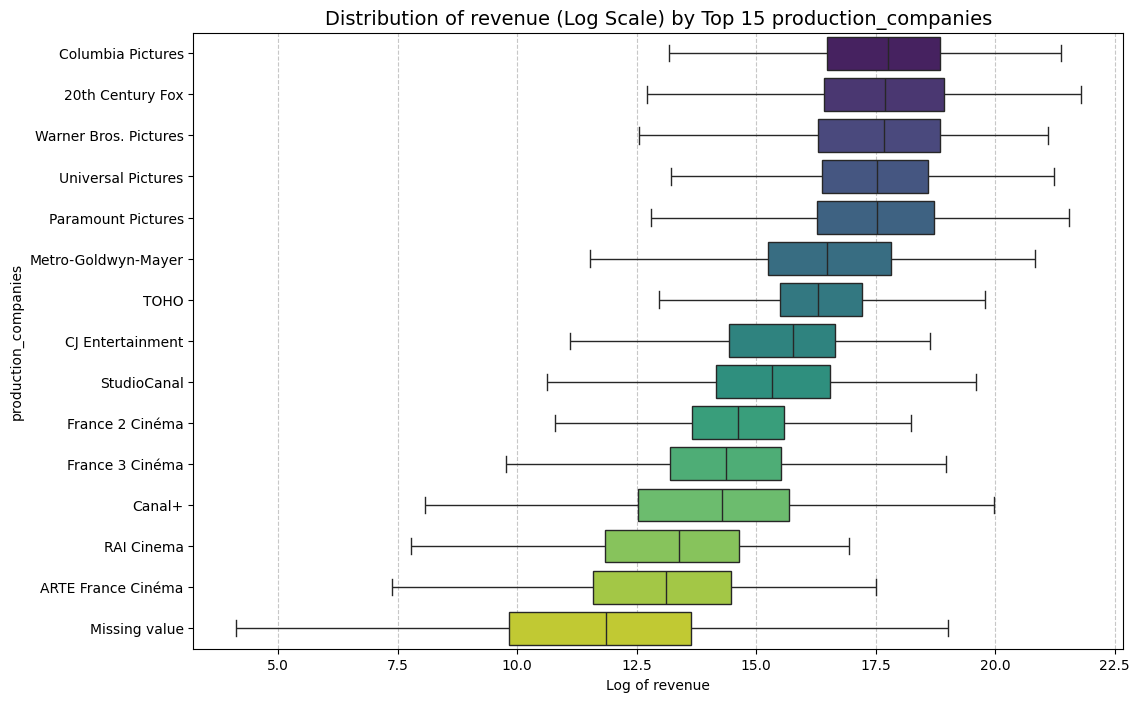

In [ ]:
plot_multivalue_boxplot(df, 'production_companies', 'revenue')

/tmp/ipython-input-2013672420.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


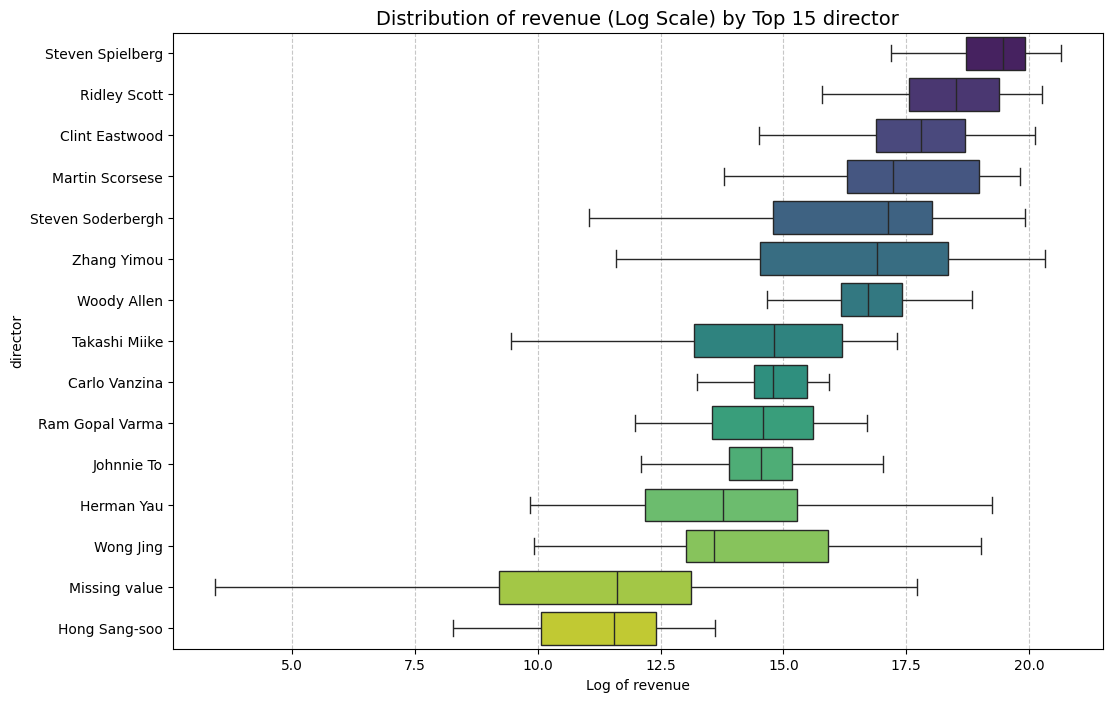

In [ ]:
plot_multivalue_boxplot(df, 'director', 'revenue')


/tmp/ipython-input-2013672420.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


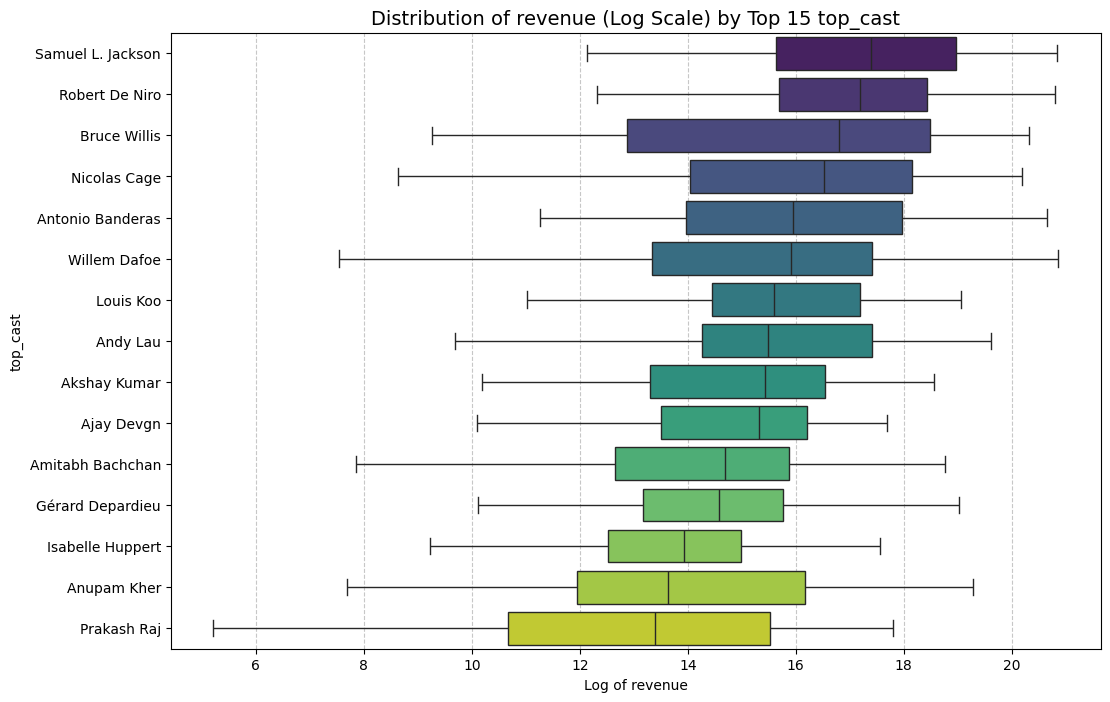

In [ ]:
plot_multivalue_boxplot(df, 'top_cast', 'revenue')

/tmp/ipython-input-2013672420.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


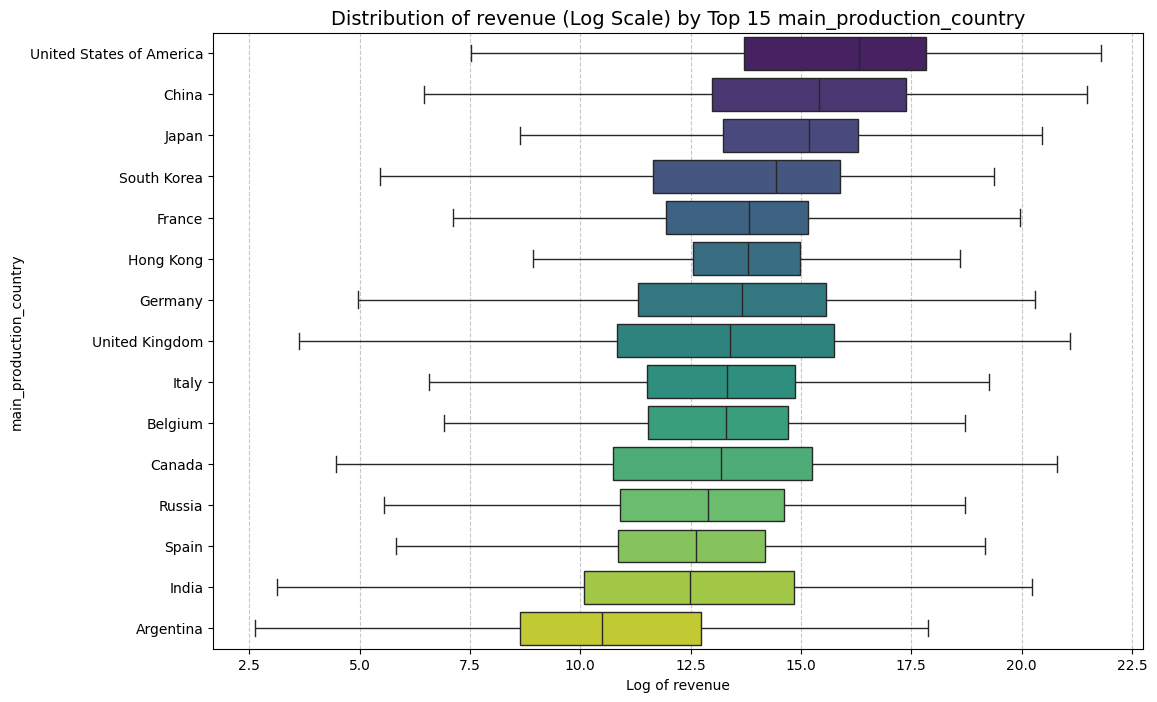

In [ ]:
plot_multivalue_boxplot(df, 'main_production_country', 'revenue')

/tmp/ipython-input-2013672420.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


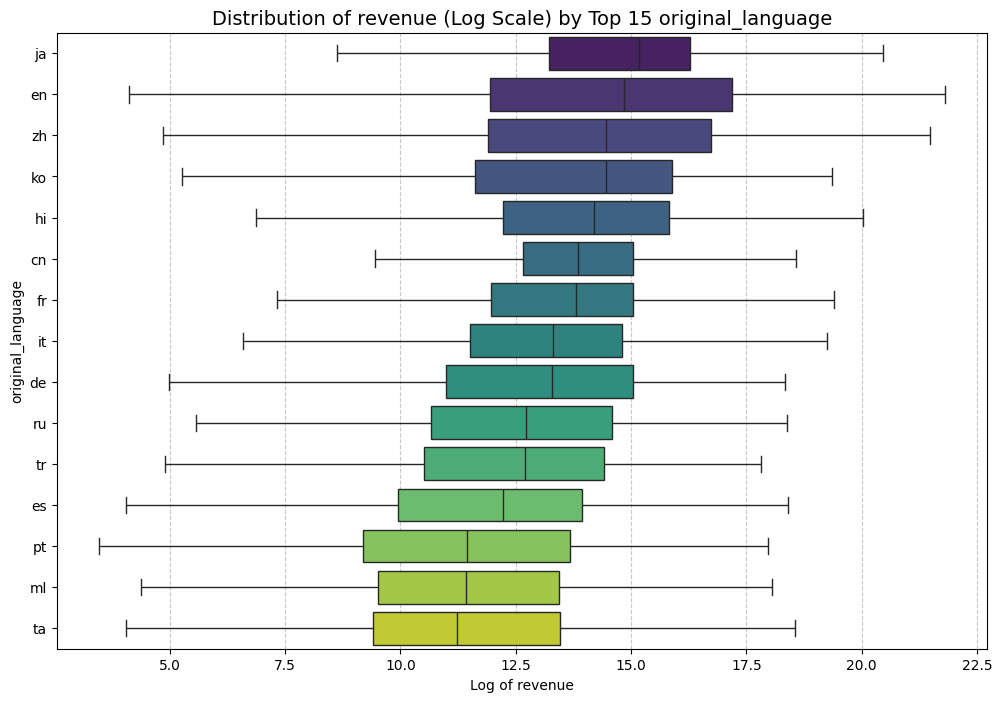

In [ ]:
plot_multivalue_boxplot(df, 'original_language', 'revenue')

### **Conclusion**:

*   all categorical columns are relevant to predicting the revenue
*   we should only use 1 column relating to actor score, eg. avg actor score



# **Criteria for training**

## Evaluation metrics: R^2, RMSLE (best metric), MAE(for interpretability)

## Spliting for train, validation and test set. Sort data by date, 70% of older movie data goes to training, the rest is split equally between validation and test set

In [ ]:
from sklearn.model_selection import train_test_split
def temporal_train_random_val_test(df, date_col='release_date'):

    # 1. Setup: Format date and sort
    df[date_col] = pd.to_datetime(df[date_col])
    df_sorted = df.sort_values(by=date_col).reset_index(drop=True)

    # 2. Identify the cutoff for the "Historical" (Train) vs "Recent" (Val/Test) data
    n = len(df_sorted)
    cutoff_index = int(n * 0.70)

    # 3. Create the Training Set (Oldest 70%)
    train_set = df_sorted.iloc[:cutoff_index]

    # 4. Create the "Holdout" Set (Newest 30%)
    holdout_set = df_sorted.iloc[cutoff_index:]

    # 5. Randomly split the Holdout set into Validation and Test
    # Since Val and Test are both 15% of the total, we split the 30% holdout in half (0.5)
    val_set, test_set = train_test_split(
        holdout_set,
        test_size=0.5,
        random_state=42,
        shuffle=True  # Randomly shuffle within this recent block
    )

    return train_set, val_set, test_set
train, val, test = temporal_train_random_val_test(df, date_col='release_date')

train.to_csv('train.csv', index=False)
val.to_csv('val.csv', index=False)
test.to_csv('test.csv', index=False)